## Import required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the dataset

In [3]:
data = pd.read_csv('climate_nasa.csv')

##  Convert 'date' to datetime format

In [4]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

## Fill missing values in 'commentsCount' with 0

In [5]:
data['commentsCount'].fillna(0, inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_8336\783920751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['commentsCount'].fillna(0, inplace=True)


## Drop rows with missing text

In [6]:
data = data.dropna(subset=['text'])

## Feature Engineering

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Add a sentiment score

In [9]:
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Use compound score for sentiment strength

data['Sentiment_Score'] = data['text'].apply(get_sentiment_score)

##  Convert sentiment score to a categorical label (positive, neutral, negative)

In [10]:
data['Sentiment_Label'] = data['Sentiment_Score'].apply(
    lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral'
)

## Add text length as a feature

In [11]:
data['Text_Length'] = data['text'].apply(len)

## Prepare features (X) and target (y)

In [12]:
X = data[['Sentiment_Score', 'commentsCount', 'Text_Length']]
y = data['likesCount']

## Split into training and testing sets

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Regressor

In [14]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predict on the test set

In [15]:
y_pred = model.predict(X_test)

## Evaluate the model

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 189.40
R-squared: 0.21


## Feature Importance

In [17]:
feature_importance = model.feature_importances_

## Visualize Feature Importance

C:\Users\ganes\AppData\Local\Temp\ipykernel_8336\1019884556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette='viridis')


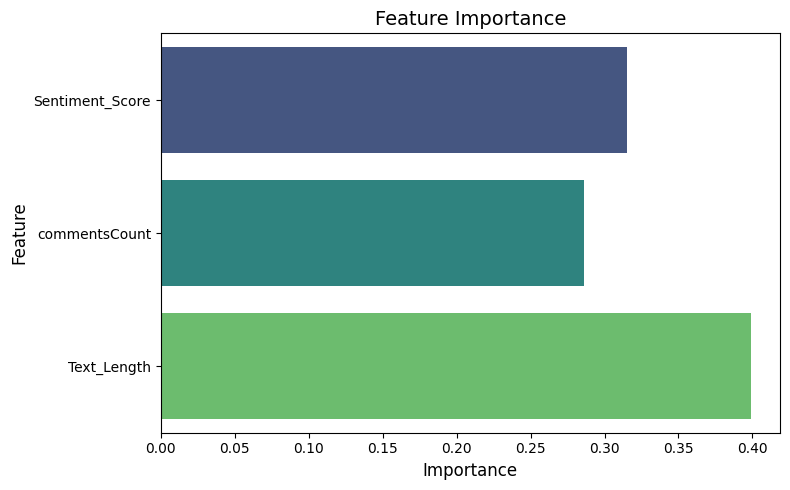

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


## Visualize Actual vs Predicted Likes

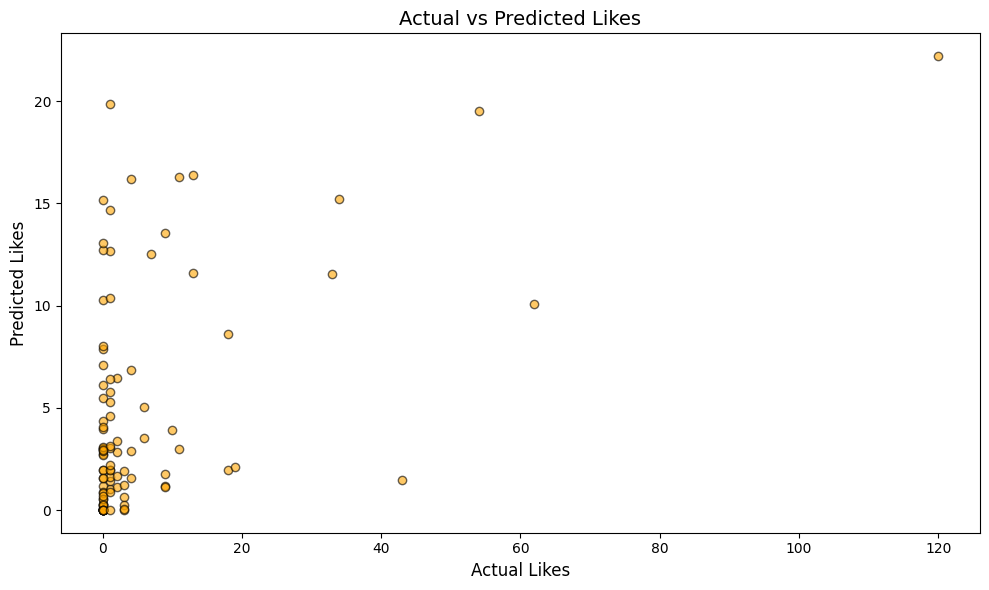

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', edgecolor='k')
plt.xlabel('Actual Likes', fontsize=12)
plt.ylabel('Predicted Likes', fontsize=12)
plt.title('Actual vs Predicted Likes', fontsize=14)
plt.tight_layout()
plt.show()